In [1]:
from pyforest import *
from matplotlib import style
style.use('ggplot')
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud 
import nltk

In [2]:
df = pd.read_csv('REDMI_7.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Review Title,Customer name,Rating,REMARK,Edited date,Category,Comments,Useful
0,Another Midrange killer Smartphe by Xiaomi,Rishikumar Thakur,4,1,10/1/2018,Display,Another Midrange killer Smartphe by Xiaomi\n\n...,
1,Another Midrange killer Smartphe by Xiaomi,Rishikumar Thakur,4,1,10/1/18,Display,Another Midrange killer Smartphe by Xiaomi\n\n...,
2,Good phe in budget,Amaz Customer,4,1,10/1/18,Battery,"Good phe in budget. Good camera,battery and pe...",
3,Good phe in budget,Amaz Customer,4,1,10/1/18,Battery,"Good phe in budget. Good camera,battery and pe...",
4,Upto You,CHANDRESH KHUNTIA,3,1,10/1/18,Others,A Bit Pricey compared to the competitors.\nNic...,e pers found this helpful


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review Title   279 non-null    object
 1   Customer name  279 non-null    object
 2   Rating         279 non-null    int64 
 3   REMARK         279 non-null    int64 
 4   Edited date    279 non-null    object
 5   Category       279 non-null    object
 6   Comments       279 non-null    object
 7   Useful         109 non-null    object
dtypes: int64(2), object(6)
memory usage: 17.6+ KB


In [5]:
df.isnull().sum()

Review Title       0
Customer name      0
Rating             0
REMARK             0
Edited date        0
Category           0
Comments           0
Useful           170
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rating', ylabel='count'>

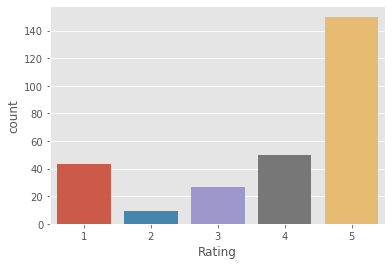

In [6]:
sns.countplot(x='Rating', data = df)

In [7]:
df.Rating.value_counts()

5    150
4     50
1     43
3     27
2      9
Name: Rating, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

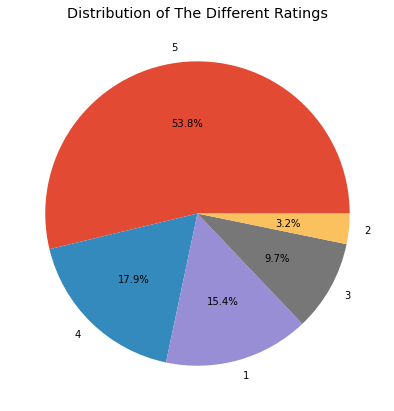

In [8]:
fig = plt.figure(figsize=(7,7))
tags = df.Rating.value_counts()
tags.plot(kind='pie', autopct= '%1.1f%%', label='')
plt.title("Distribution of The Different Ratings")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count', ylabel='Category'>

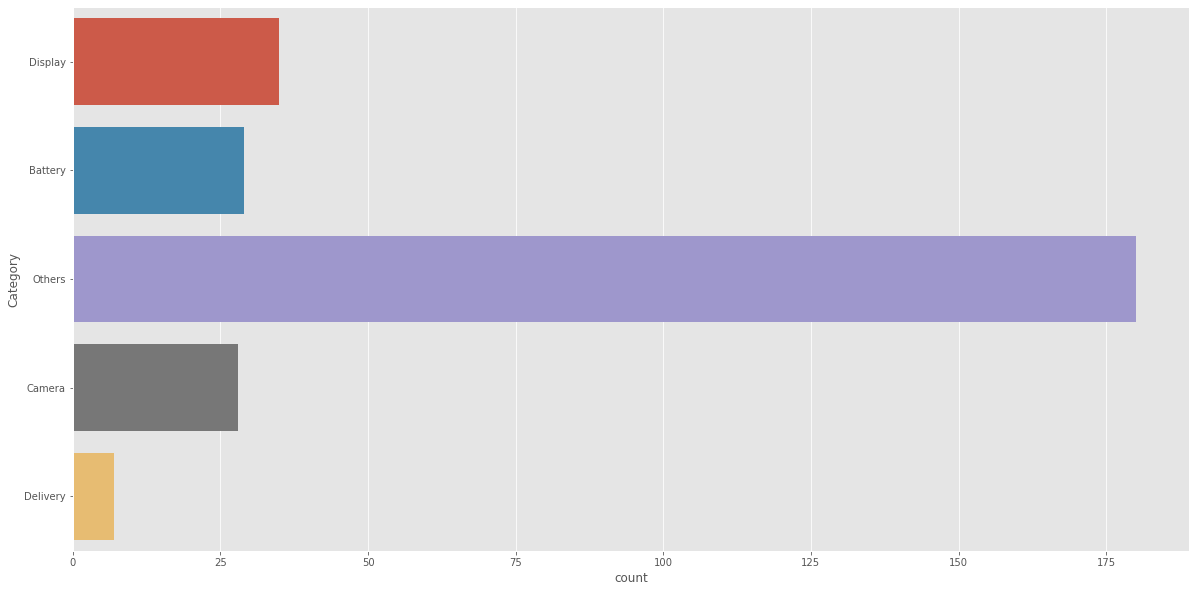

In [9]:
 fig = plt.figure(figsize=(20,10))   
 sns.countplot(y='Category', data=df)

In [10]:
df.Category.value_counts()

Others      180
Display      35
Battery      29
Camera       28
Delivery      7
Name: Category, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

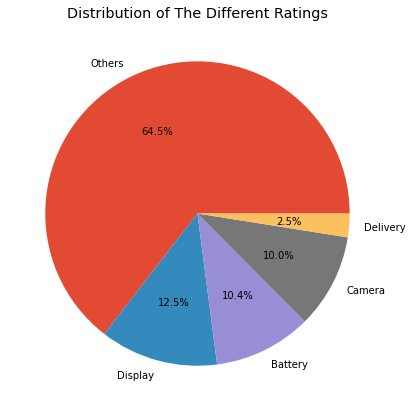

In [11]:
fig = plt.figure(figsize=(7,7))
tags = df.Category.value_counts()
tags.plot(kind='pie', autopct= '%1.1f%%', label='')
plt.title("Distribution of The Different Ratings")
plt.show()

In [12]:
df[df['Category']=='Display']['Rating'].value_counts()

5    15
4    12
1     6
3     2
Name: Rating, dtype: int64

In [13]:
df[df['Category']=='Others']['Rating'].value_counts()

5    112
4     23
1     22
3     17
2      6
Name: Rating, dtype: int64

In [14]:
df[df['Category']=='Delivery']['Rating'].value_counts()

5    5
4    2
Name: Rating, dtype: int64

In [15]:
df[df['Category']=='Camera']['Rating'].value_counts()

1    9
4    9
5    4
3    3
2    3
Name: Rating, dtype: int64

In [16]:
df[df['Category']=='Battery']['Rating'].value_counts()

5    14
1     6
3     5
4     4
Name: Rating, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

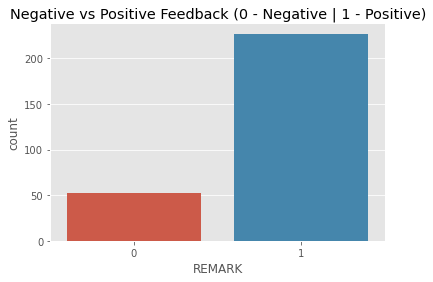

In [17]:
sns.countplot(x='REMARK', data = df)
plt.title('Negative vs Positive Feedback (0 - Negative | 1 - Positive)')
plt.show()

In [18]:
df.REMARK.value_counts()

1    227
0     52
Name: REMARK, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

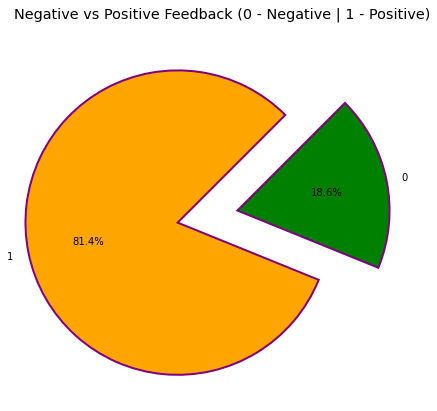

In [19]:
fig = plt.figure(figsize=(7,7))
colors = ("orange", "green")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags = df.REMARK.value_counts()
explode = (0.3, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=45,
          wedgeprops = wp, label='', explode = explode)
plt.title("Negative vs Positive Feedback (0 - Negative | 1 - Positive)")
plt.show()

In [20]:
for i in range(5):
    print(df['Comments'].iloc[i], "\n")
    print(df['REMARK'].iloc[i], "\n")

Another Midrange killer Smartphe by Xiaomi

Major Highlights:
• The Redmi 6 Pro sports a 5.84-inch full-HD+ display with a notch
• Powered by the Qualcomm Snapdrag 625 SoC
• The phe is priced at Rs. 10,999 for the 3GB RAM variant (Start Point)
• Battery of 4090 mAh and its Durability
• The Tripple Slots
• Dual AI Camera

Well in Redmi 6 Series you will get 3 Different Smartphes with different specs, and from all of them, Redmi 6 pro is most powerful and advanced (as said by Redmi India in their launch event).

Xiaomi Redmi 6 Pro design:
Being the most premium phe of the new Redmi 6 family, the Redmi 6 Pro has been given somewhat better materials, in the form of a metal backplate. However, the overall design isn’t too different from what we’ve already seen from Xiaomi at around this price point. This is a fairly thick phe, and it's a bit hefty too, but it’s manageable. The butts have good feedback without being noisy, and  the left side, you get a single tray which can hold two SIM card

In [21]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+https\S+",'', text, flags = re.MULTILINE)
    text = re.sub(r'[^\w\s]', '',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [22]:
df.Comments = df['Comments'].apply(data_processing)

In [23]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [24]:
 df['Comments'] = df['Comments'].apply(lambda x:stemming(x))

In [25]:
for i in range(5):
    print(df['Comments'].iloc[i], "\n")
    print(df['REMARK'].iloc[i], "\n")

another midrange killer smartphe xiaomi major highlights redmi 6 pro sports 584inch fullhd display notch powered qualcomm snapdrag 625 soc phe priced rs 10999 3gb ram variant start point battery 4090 mah durability tripple slots dual ai camera well redmi 6 series get 3 different smartphes different specs redmi 6 pro powerful advanced said redmi india launch event xiaomi redmi 6 pro design premium phe new redmi 6 family redmi 6 pro given somewhat better materials form metal backplate however overall design isnt different weve already seen xiaomi around price point fairly thick phe bit hefty manageable butts good feedback without noisy left side get single tray hold two sim cards separate microsd card something worth noting redmi 6 pro support dual 4g volte means ly e sim cnect 4g network time placement ports good mo speaker bottom right chances blocking using phe landscape mode slim headphe socket placed top also get infrared ir emitter used ctrol ir appliances mi remote app xiaomi redm

In [26]:
pos_reviews = df[df.REMARK==1]
pos_reviews.head()

,Review Title,Customer name,Rating,REMARK,Edited date,Category,Comments,Useful
0,Another Midrange killer Smartphe by Xiaomi,Rishikumar Thakur,4,1,10/1/2018,Display,another midrange killer smartphe xiaomi major ...,
1,Another Midrange killer Smartphe by Xiaomi,Rishikumar Thakur,4,1,10/1/18,Display,another midrange killer smartphe xiaomi major ...,
2,Good phe in budget,Amaz Customer,4,1,10/1/18,Battery,good phe budget good camerabattery performance...,
3,Good phe in budget,Amaz Customer,4,1,10/1/18,Battery,good phe budget good camerabattery performance...,
4,Upto You,CHANDRESH KHUNTIA,3,1,10/1/18,Others,bit pricey compared competitors nice sleek bod...,e pers found this helpful


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Most Frequently Used Words In Positive Review')

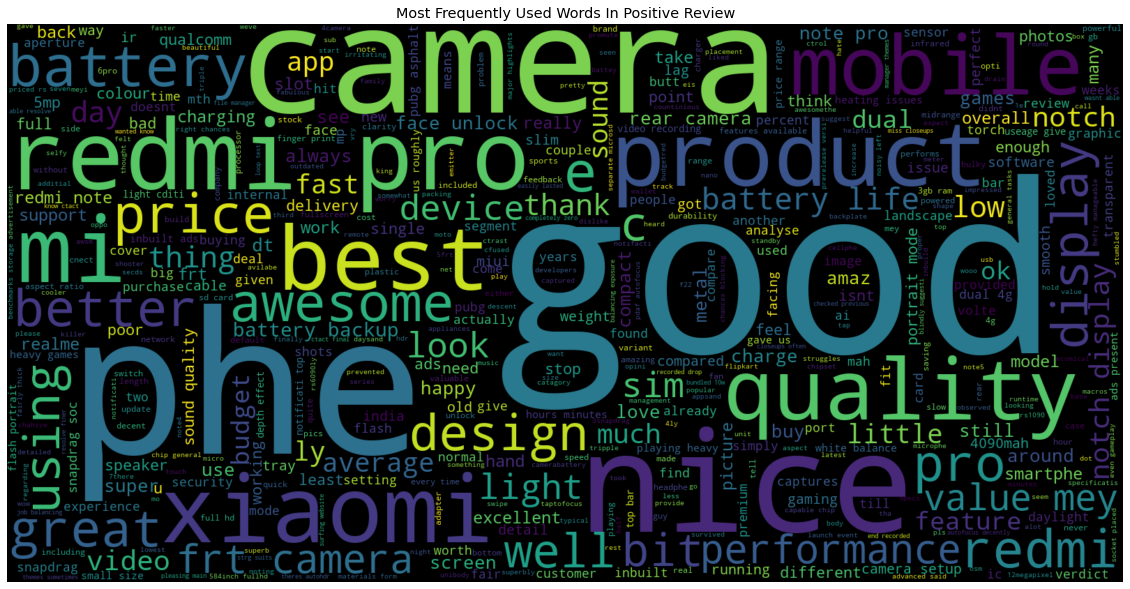

In [27]:
text = ' '.join([word for word in pos_reviews['Comments']])
plt.figure(figsize=(20,155), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words In Positive Review')

In [29]:
neg_reviews = df[df.REMARK==0]
neg_reviews.head()

,Review Title,Customer name,Rating,REMARK,Edited date,Category,Comments,Useful
7,Waste of mey compare another phe,Praveen gurjar,1,0,10/1/18,Battery,sometimes automatically speaker little hanging...,NaN
14,It Hangs,Ranjeet,1,0,10/1/18,Others,using 10 days writing phe well mi a2 hangs ple...,NaN
20,Worst frt camera a Mi device till date.,Ram Rajkishore,1,0,9/15/18,Camera,worst frt camera ever seen mi deviceits disgus...,NaN
21,Look some other optis guys.... It's just a crap.,Shubham jaishwal,1,0,9/15/18,Display,guys dt buy redmi 6 pro atleast got delivered ...,NaN
23,D't buy this mobile mi 6 pro,Vasudevan,1,0,9/15/18,Display,poor quality frt facing camera sound quality p...,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Most Frequently Used Words In Negative Review')

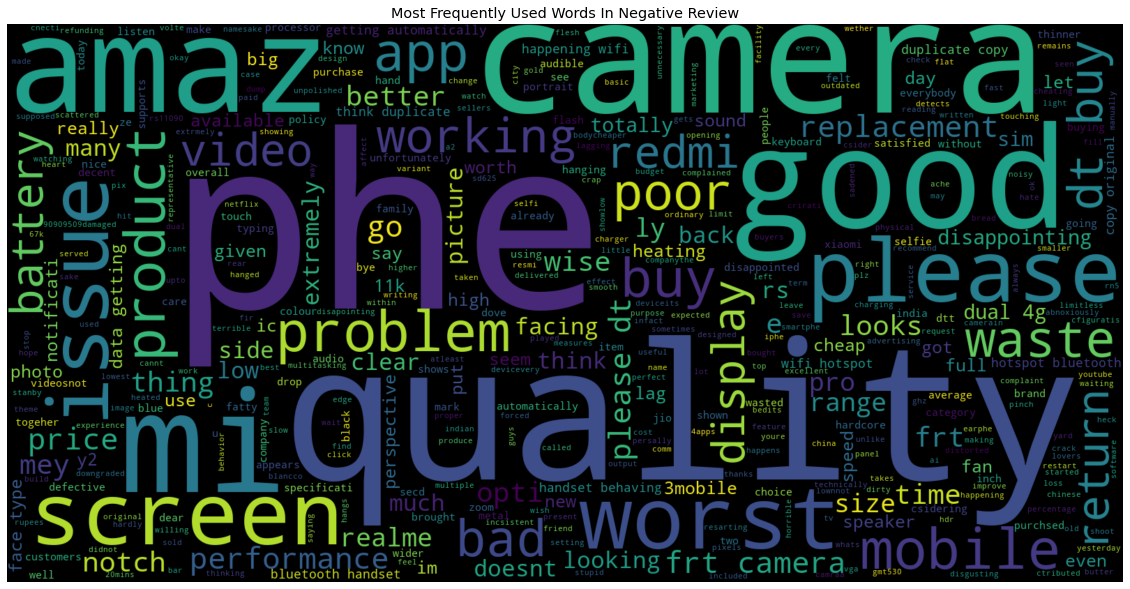

In [31]:
text = ' '.join([word for word in neg_reviews['Comments']])
plt.figure(figsize=(20,155), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words In Negative Review')